In [1]:
from mdagent import MDAgent

In [2]:
#todays date and time
import datetime

start = datetime.datetime.now()
date = start.strftime("%Y-%m-%d")
print("date:",date)
time = start.strftime("%H:%M:%S")
print("time:",time)

date: 2024-09-30
time: 21:34:06


In [3]:
descriptive_prompt_4 = "Complete the following MD tasks: 1. Download the PDB file 1ZNI. 2. Pre-process the file by adding missing atoms, hydrogens, and replacing non-standard residues. 3. Simulate for 1 ps at 300 K. 4. Calculate the RMSD of the simulation."
non_descriptive_prompt_4 = "Simulate protein 1ZNI at 300 K for 1 ps and calculate the RMSD."

In [4]:
llm_model = "gpt-4o-2024-08-06"
tools = "all"

In [5]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)

##### descriptive prompt

In [6]:
start1 = datetime.datetime.now()
agent_1.run(descriptive_prompt_4)

Thought: I will start by downloading the PDB file 1ZNI. Once downloaded, I will proceed with the pre-processing steps, followed by setting up and running the simulation, and finally calculating the RMSD. Let's begin with downloading the PDB file.

Action:
```json
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "1ZNI"
  }
}
```PDB file found with this ID: 1ZNI
Thought: Now that the PDB file 1ZNI has been successfully downloaded, the next step is to pre-process the file by adding missing atoms, hydrogens, and replacing non-standard residues. I will proceed with this pre-processing step.

Action:
```json
{
  "action": "CleaningToolFunction",
  "action_input": {
    "pdb_id": "1ZNI_213411",
    "replace_nonstandard_residues": true,
    "add_missing_atoms": true,
    "remove_heterogens": true,
    "remove_water": true,
    "add_hydrogens": true,
    "add_hydrogens_ph": 7.0
  }
}
```file path: /Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_423/pdb/1ZNI_raw_20240930_213411.

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [7]:
end = datetime.datetime.now()
elapsed = end - start1
print(f"agent_1 duration: {elapsed.total_seconds()/60:.2f} minutes")

agent_1 duration: 0.70 minutes


In [8]:
agent_1.path_registry.list_path_names()

'Names found in registry: 1ZNI_093450, 1ZNI_093452, 1ZNI_093500, 1ZNI_093508, top_sim0_093513, sim0_093513, rec0_093514, rec1_093514, rec2_093514, rmsd_093513, fig0_093526'

In [9]:
registry = agent_1.path_registry
all_names = registry.list_path_names()
print(all_names)

Names found in registry: 1ZNI_093450, 1ZNI_093452, 1ZNI_093500, 1ZNI_093508, top_sim0_093513, sim0_093513, rec0_093514, rec1_093514, rec2_093514, rmsd_093513, fig0_093526


In [10]:
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1ZNI_093450: PDB file downloaded from RSCB
 PDBFile ID: 1ZNI_093450
 1ZNI_093452: Cleaned File:  Replaced Nonstandard Residues. Missing Atoms Added and replaces nonstandard residues. 
 1ZNI_093500: Cleaned File:  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 1ZNI_093508: Cleaned File:  Removed Heterogens
 and Water Kept.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_093513: Initial positions for simulation sim0_093513
 sim0_093513: Basic Simulation of Protein 1ZNI_093508
 rec0_093514: Simulation trajectory for protein 1ZNI_093508 and simulation sim0_093513
 rec1_093514: Simulation state log for protein 1ZNI_093508 and simulation sim0_093513
 rec2_093514: Simulation pdb frames for protein 1ZNI_093508 and simulation sim0_093513
 rmsd_093513: RMSD for 093513
 fig0_093526: RMSD plot for 093513


In [11]:
# let's see if we can't grab the plot
import re
import os
match = re.search(rf"fig0_\d+", all_names)
plot_path = registry.get_mapped_path(match.group(0))
assert os.path.exists(plot_path)

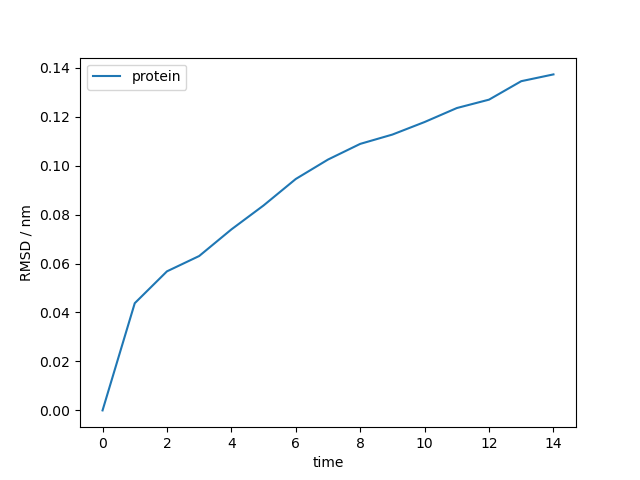

In [12]:
from IPython.display import Image
Image(filename=plot_path)

##### non-descriptive prompt

In [13]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
start2 = datetime.datetime.now()
agent_2.run(non_descriptive_prompt_4)

Thought: To simulate protein 1ZNI at 300 K for 1 ps and calculate the RMSD, I need to first download the PDB file for protein 1ZNI, set up and run the simulation, and then compute the RMSD. I will start by downloading the PDB file for 1ZNI.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1ZNI"
}
```PDB file found with this ID: 1ZNI
To proceed with the simulation of protein 1ZNI at 300 K for 1 ps, I need to set up and run the simulation using the downloaded PDB file. After the simulation, I will calculate the RMSD. I will start by setting up and running the simulation.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1ZNI_114124",
    "forcefield_files": ["amber99sb.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
    

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [14]:
end = datetime.datetime.now()
elapsed = end - start2
print(f"agent_2 duration: {elapsed.total_seconds()/60:.2f} minutes")

agent_2 duration: 0.36 minutes


In [15]:
registry = agent_2.path_registry
all_names = registry.list_path_names()
print(all_names)

Names found in registry: 1ZNI_114124, 1ZNI_114131, top_sim0_114135, sim0_114135, rec0_114135, rec1_114135, rec2_114135, rmsd_114135, fig0_114140


In [16]:
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1ZNI_114124: PDB file downloaded from RSCB
 PDBFile ID: 1ZNI_114124
 1ZNI_114131: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_114135: Initial positions for simulation sim0_114135
 sim0_114135: Basic Simulation of Protein 1ZNI_114131
 rec0_114135: Simulation trajectory for protein 1ZNI_114131 and simulation sim0_114135
 rec1_114135: Simulation state log for protein 1ZNI_114131 and simulation sim0_114135
 rec2_114135: Simulation pdb frames for protein 1ZNI_114131 and simulation sim0_114135
 rmsd_114135: RMSD for 114135
 fig0_114140: RMSD plot for 114135


In [17]:
# let's see if we can't grab the plot
import re
import os
match = re.search(rf"fig0_\d+", all_names)
plot_path = registry.get_mapped_path(match.group(0))
assert os.path.exists(plot_path)

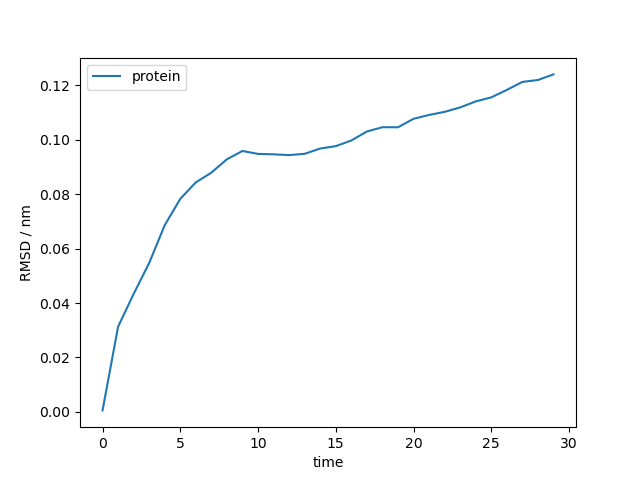

In [18]:
from IPython.display import Image
Image(filename=plot_path)